In [3]:
# import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Dropout 
from tensorflow.keras.models import Model

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# load MNIST fashion dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

# assign train and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Shape of x_train: ", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Shape of x_train:  (60000, 28, 28)


In [4]:
# since our images are 28x28, we need to reshape the data to include the channel dimension by adding a dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Shape of x_train: ", x_train.shape)

Shape of x_train:  (60000, 28, 28, 1)


In [5]:
# find number of classes
k = np.unique(y_train).shape[0]
print("Number of classes: ", k)

Number of classes:  10


In [2]:
# build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=3, strides=2, activation='relu')(i)
x = Conv2D(filters=64, kernel_size=3, strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

NameError: name 'Input' is not defined

In [11]:
# compile and fit the model using CPU
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 16s 16ms/step - loss: 0.6065 - accuracy: 0.7750 - val_loss: 0.4284 - val_accuracy: 0.8375
Epoch 2/15
938/938 [==============================] - 16s 17ms/step - loss: 0.3922 - accuracy: 0.8544 - val_loss: 0.3680 - val_accuracy: 0.8667
Epoch 3/15
938/938 [==============================] - 16s 17ms/step - loss: 0.3379 - accuracy: 0.8754 - val_loss: 0.3414 - val_accuracy: 0.8710
Epoch 4/15
938/938 [==============================] - 15s 16ms/step - loss: 0.3076 - accuracy: 0.8877 - val_loss: 0.3341 - val_accuracy: 0.8788
Epoch 5/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2828 - accuracy: 0.8960 - val_loss: 0.3119 - val_accuracy: 0.8869
Epoch 6/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2636 - accuracy: 0.9020 - val_loss: 0.2932 - val_accuracy: 0.8950
Epoch 7/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2459 - accuracy: 0.9089 - val_loss: 0.3072 - val_accuracy:

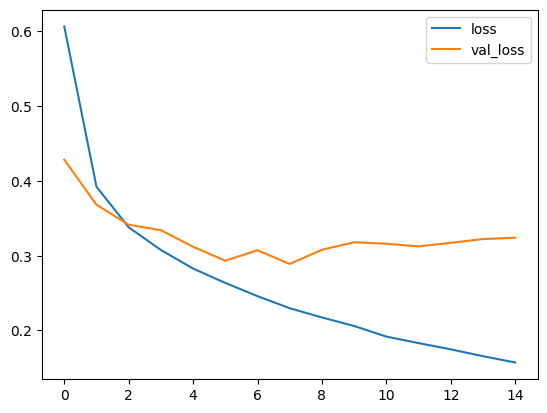

In [12]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

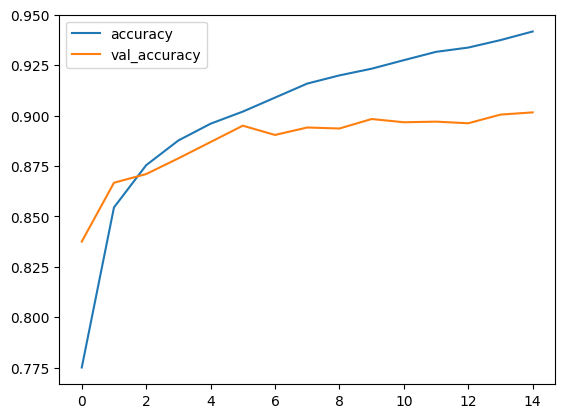

In [13]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [14]:
# labels labeling
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

In [23]:
# find prediction for test data
p_test = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 5ms/step


Text(0.5, 1.0, 'True label: Dress, Predicted label: Shirt')

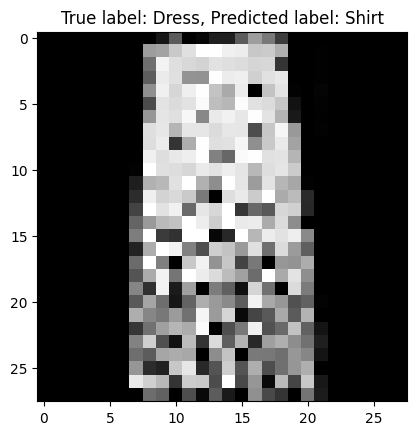

In [25]:
# show some misclassified images
misclassified_images = np.where( p_test != y_test)[0]
i = np.random.choice(misclassified_images)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True label: {labels[y_test[i]]}, Predicted label: {labels[p_test[i]]}")
